# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some useful functions of the Scikit-Learn library

Overview:
    
 0. An end-to-end SciKit-Learn workflow
 1. Getting the data ready
 2. Choose the right estimator/algorithm for our problems
 3. Fit the model/algo and use it to make predictions for our data
 4. Evaluating a model
 5. Improve a model
 6. Save and load a trained model
 7. Putting it all together
    
    

## 0. An end-to-end Scikit-Learn workflow

In [8]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

heart_disease = pd.read_csv("C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# Create X (features matrix)
x = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [10]:
# 2. Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [12]:
clf.fit(x_train, y_train);

In [13]:
# make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

C:\Users\cwins\anaconda3New\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [14]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [15]:
y_test

185    0
295    0
138    1
233    0
196    0
      ..
221    0
146    1
171    0
167    0
34     1
Name: target, Length: 61, dtype: int64

In [16]:
# 4. Evaluate the model on the training data and test data

clf.score(x_train, y_train)

1.0

In [17]:
clf.score(x_test, y_test)

0.8688524590163934

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.83      0.83      0.83        24

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [19]:
confusion_matrix(y_test, y_preds)

array([[33,  4],
       [ 4, 20]], dtype=int64)

In [20]:
accuracy_score(y_test,y_preds)

0.8688524590163934

In [21]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:2f}%")

Trying model with 10 estimators...
Model accuracy on test set: 77.049180%
Trying model with 20 estimators...
Model accuracy on test set: 86.885246%
Trying model with 30 estimators...
Model accuracy on test set: 78.688525%
Trying model with 40 estimators...
Model accuracy on test set: 78.688525%
Trying model with 50 estimators...
Model accuracy on test set: 81.967213%
Trying model with 60 estimators...
Model accuracy on test set: 85.245902%
Trying model with 70 estimators...
Model accuracy on test set: 83.606557%
Trying model with 80 estimators...
Model accuracy on test set: 86.885246%
Trying model with 90 estimators...
Model accuracy on test set: 83.606557%


In [22]:
# 6. Save a model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [23]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(x_test, y_test)

0.8360655737704918

## 1. Getting data ready to be used with machine learning

Three main things to do:
    1. Split the data into features nad labels (usually 'x' & 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [24]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [29]:
x.shape[0] * 0.8

242.4

In [30]:
242 + 61

303

In [31]:
len(heart_disease)

303

## 1.1 Make sure it's all numerical

In [32]:
 car_sales = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\car-sales-extended.csv')

In [33]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [34]:
len(car_sales)

1000

In [35]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [36]:
# Split into x/y
x = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# Split into training and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(x)
transformed_x

In [ ]:
x.head()
pd.DataFrame(transformed_x)

In [ ]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# Let's refit the model

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size = 0.2)

model.fit(x_train, y_train)

In [ ]:
model.score(x_test,y_test)

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.


In [38]:
 # Import car sales missing data
car_sales_missing = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\car-sales-extended-missing-data.csv')

In [39]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
# Create x & y
x= car_sales_missing.drop("Price", axis = 1)
y= car_sales_missing["Price"]

# Let's try to convert our data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with Pandas

In [42]:
# Fill the "Make" column

car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

In [43]:
# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

In [44]:
# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [45]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [46]:
# Remove rows with missing price value

car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [47]:
len(car_sales_missing)

950

In [48]:
x = car_sales_missing.drop("Price", axis = 1)
y= car_sales_missing["Price"]

In [49]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [50]:
car_sales_missing = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\car-sales-extended-missing-data.csv')

In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
# Split into x & y
x= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [54]:
# Fill missing values with Scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' $ numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
    ])

# Transform the data

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [55]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns = ["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [56]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [57]:


# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder = "passthrough" )

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [58]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size= 0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

## 2. Choosing the right estimator/algo for your problem

Some things to note:

* Sklearn refers to machine learning models and algorithms as estimators
* Classification problem = predicting a category (heart disease or not)
   * Sometimes you'll see 'clf' (short for classifier) used as a classification estimator
* Regression problem = predicting a number (Sales price of car)   

In [59]:
### 2.1 Picking a machine learning model for a regression problem

# Let's use the California Housing dataset

In [60]:
# Get California housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
# Import algorithm

from sklearn.linear_model import Ridge


# Setup random seed
np.random.seed(42)

# Create the data

x = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

In [ ]:
# What if 'Ridge' didn't work or the score didn't fit our needs?

# Try a different model


In [ ]:
# Ensemble model (combination of smaller models to enhance predictions)

In [ ]:
# Import the RandomForestRegressor model class from the ensemble model
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y= housing_df["target"]

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(x_train,y_train)

# Check the score of the model (on the test set)

model.score(x_test,y_test)

## 2.2 Picking a machine learning model for a classification problem


In [ ]:
heart_disease = pd.read_csv('C:\\Users\\cwins\\Downloads\\zero-to-mastery-ml-masterUNZIPPED\\zero-to-mastery-ml-master\\data\\heart-disease.csv')

In [ ]:
heart_disease.head()

In [ ]:
len(heart_disease)

In [64]:
 # Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate LinearSVC

clf = LinearSVC()
clf.fit(x_train,y_train)

# Evaluate the LinearSVC
clf.score(x_test,y_test)

C:\Users\cwins\anaconda3New\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [65]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [66]:
 # Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train,y_train)

# Evaluate the RandomForestClassifier
clf.score(x_test,y_test)

0.8524590163934426

In [67]:
# If you have structured data, use ensemble methods
# If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algo on our data and use it to make predictions

### 3.1 Fitting the model to our data

In [68]:
 # Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train,y_train)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(x_test,y_test)

0.8524590163934426

In [69]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [70]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. predict()
2. predict_proba()

In [71]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) # This doesn't work!! (example)

C:\Users\cwins\anaconda3New\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [72]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [73]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [75]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

## Make predictions with predict_proba()


In [78]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [79]:
# Let's predict() on the same data...
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [80]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## predict() can also be used for regression models

In [81]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [82]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data

x = housing_df.drop("target", axis = 1)
y = housing_df["target"]

# split into training and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# fit the model to the data
model.fit(x_train,y_train)

# make predictions 
y_preds = model.predict(x_test)

In [83]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [84]:
 np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [85]:
len(y_preds)

4128

In [86]:
len(y_test)

4128

In [87]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

In [88]:
housing_df["target"] 

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

    1. Estimator's built-in score() method
    2. The scoring parameter
    3. Problem-specific metric functions

### 4.1 Evaluating a model with the score method

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
clf.score(x_train,y_train)

1.0

In [91]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [92]:
clf.score(x_test,y_test)

0.8524590163934426

In [93]:
## Using the score() method on our regression problem

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data

x = housing_df.drop("target", axis=1)
y= housing_df["target"]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create model instance

model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data 
model.fit(x_train,y_train)

RandomForestRegressor()

In [95]:
model.score(x_test,y_test)

0.8065734772187598

In [96]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 4.2 Evaluating a model using the 'scoring' parameter

In [97]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

# Fit the model to the data (training the machine learning model)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [98]:
clf.score(x_test,y_test)

0.8524590163934426

In [99]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [100]:
cross_val_score(clf,x,y,cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [101]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [102]:
np.random.seed(42)

In [103]:
# Single training and test split score
clf_single_score = clf.score(x_test,y_test)

# Take the mean of 5-fold cross val score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [104]:
# Default scoring parameter of classfier = mean accuracy


# Scoring parameter set to None by default
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [105]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,x,y,cv=5)

In [106]:
np.mean(cross_val_score)

0.8248087431693989

In [107]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


** Area under the receiver operating characteristic curv (AUC/ROC) **

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) vs. a model false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [108]:
# Create x_test ...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)


from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(x_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [109]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [110]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

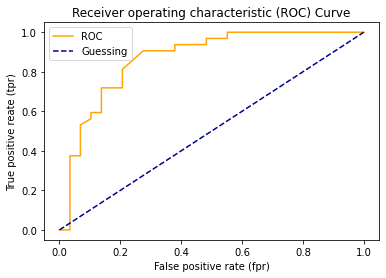

In [111]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) 
    and true positive rate (tpr) of a model.
    """
    
    # plot roc curve
    plt.plot(fpr,tpr,color="orange", label = "ROC")
    
    # Plot line with no predictive power
    
    plt.plot([0,1],[0,1], color = "darkblue", linestyle = "--", label = "Guessing")
    
    # Customize the plot
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive reate (tpr)")
    plt.title("Receiver operating characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)    
    

In [112]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

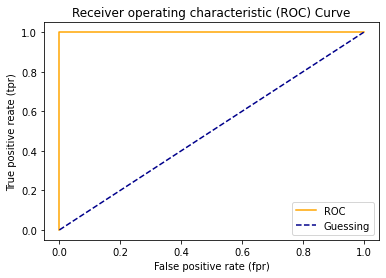

1.0

In [113]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

# Perfect AUC score
roc_auc_score(y_test,y_test)

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and 
the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [114]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [115]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [116]:
23 + 6 + 6 + 26

61

In [117]:
len(x_test)

61

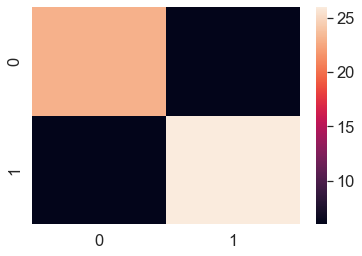

In [118]:


# Make our confusion matrix more visual with Seabor's heatmap()

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

In [119]:
import sklearn
sklearn.__version__

'1.0.2'

In [120]:
clf

RandomForestClassifier()

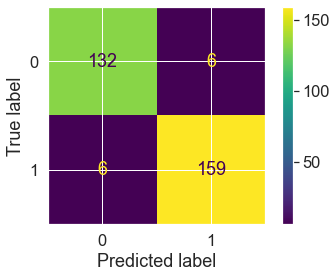

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf,x,y)

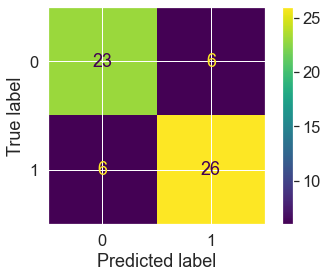

In [122]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

### Classification Report

In [124]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [127]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,
                                  output_dict=True))

C:\Users\cwins\anaconda3New\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cwins\anaconda3New\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cwins\anaconda3New\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaulation metrics

1. R^2 (r-squared or coefficient of determination)
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [129]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target",axis=1)
y= housing_df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [130]:
model.score(x_test,y_test)

0.8065734772187598

In [131]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [132]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [133]:
y_test.mean()

2.0550030959302275

In [134]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [135]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [136]:
r2_score(y_test,y_test_mean)

0.0

In [137]:
r2_score(y_test,y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions 
and actual values.
It gives you an idea of how wrong your model's predictions are.

In [138]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [139]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [140]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [141]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predicted values":y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [142]:
df["differences"].mean()

0.012048392126937535

In [144]:
# MAE using formulas and differences

np.abs(df["differences"]).mean()

0.32659871732073803

### Mean Squared error (MSE)

MSE is the mean of the square of the errors between actual and predicted values

In [145]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse


0.2534678520824551

In [146]:
df["squared_differences"]= np.square(df["differences"])

In [147]:
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [151]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.25346785208245565

In [154]:
df_large_error= df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [155]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [156]:
# calculate MSE with large error
df["squared_differences"].mean()

0.25346785208245565

In [157]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [159]:
df_large_error["squared_differences"].mean()

0.733418071208813